# SIR metapopulation model for humans (density dependent transmission)
This is the Python version of program 7.1 from page 241 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as fmp

In [6]:
#parameters (time units are days)


n=5; #number of subpopulations
beta=1.0*np.ones(n); #transmission rate between subpopulations
gamma=0.1*np.ones(n); #recovery rate
nu=0.0001*np.ones(n); #birth rate
mu=0.0001*np.ones(n); #death rate
m=0.001*np.ones((n,n)); m=m-np.diag(np.diag(m)); #migration rate between subpopulations

#initial conditions
X0=0.1*np.ones(n); 
Y0=0.0*np.ones(n); Y0[0]=0.0001;
INPUT=np.hstack((X0,Y0))

ND=MaxTime=2910.0; #number of says
TS=1.0 #time step

In [7]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2*n))
	V = INP   
	for i in range(n):
		Y[i] = nu[i] - beta[i]*V[i]*V[n+i] - mu[i]*V[i]; 
		Y[n+i] = beta[i]*V[i]*V[n+i] - mu[i]*V[n+i] - gamma[i]*V[n+i]
		for j in range(n):
			Y[i]+=m[i][j]*V[j] - m[j][i]*V[i];
			Y[n+i]+=m[i][j]*V[n+j] - m[j][i]*V[n+i];
	return Y   # For odeint

In [10]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

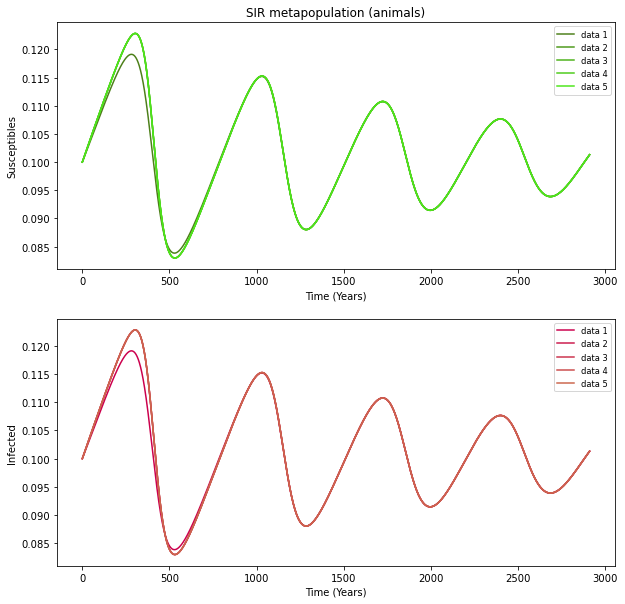

In [18]:
#Ploting
fig=plt.figure(figsize=(10,10))
plt.title('SIR metapopulation (animals)')
plt.axis('off')
fig.add_subplot(211)
for i in range(n):
    plt.plot(t_range,RES[:,i], label=('data %s' %(i+1)), color=(0.3,i/10.+0.5,0.1))
plt.xlabel('Time (Years)')
plt.ylabel('Susceptibles')
plt.legend(loc=1,prop = fmp(size='smaller'))
fig.add_subplot(212)
for i in range(n):
	plt.plot(t_range,RES[:,i], label=('data %s' %(i+1)), color=(0.8,i/10.+0.,0.3))
plt.ylabel('Infected')
plt.xlabel('Time (Years)')
plt.legend(loc=1,prop = fmp(size='smaller'))
plt.show()
fig.savefig('metapopulation_animals.pdf')